# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

In [10]:
import numpy as np
from sklearn.linear_model import Ridge

x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alpha_values = [0.01, 0.1, 1.0] # change here

# add 1-3 line of code here
for alpha in alpha_values:
    w = np.linalg.inv(x.T@x + alpha * I)@x.T@y
    w=w.ravel()

    ridge_reg = Ridge(alpha, fit_intercept=False)
    ridge_reg.fit(np.asarray(x), np.asarray(y))
# add 1-3 lines to compare the results

    print(f"Alpha: {alpha} | My method: {w} | Sklearn Ridge coefficients: {ridge_reg.coef_}")


Alpha: 0.01 | My method: [[-167.85534019    1.54416013]] | Sklearn Ridge coefficients: [-167.85534019    1.54416013]
Alpha: 0.1 | My method: [[-101.72397081    1.16978757]] | Sklearn Ridge coefficients: [-101.72397081    1.16978757]
Alpha: 1.0 | My method: [[-20.59044706   0.71048616]] | Sklearn Ridge coefficients: [-20.59044706   0.71048616]


## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

In [45]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [ ]:
def sgd(x, y, alpha, epochs):
    lambda_reg=0.1
    m = len(y)
    theta = np.zeros((x.shape[1], 1))  

    for epoch in range(epochs):
        for j in range(m):
            rand_index = np.random.randint(m)
            x_i = x[rand_index:rand_index+1]
            y_i = y[rand_index:rand_index+1]

            gradient = x_i.T @ (x_i @ theta - y_i) + lambda_reg * np.sign(theta)
            theta -= alpha * gradient

    return theta

In [63]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled = np.c_[np.ones((x_scaled.shape[0], 1)), x_scaled]

alpha = 0.01 
epochs = 1000  
lambda_reg = 0.1 

sgd_weights = sgd(x_scaled, y, alpha, epochs)

print("\nSGD Lasso Weights:")
print(f"  w0 (bias)   = {sgd_weights[0, 0]}")
print(f"  w1 (weight) = {sgd_weights[1, 0]}")

lasso = Lasso(alpha=lambda_reg, fit_intercept=False)
lasso.fit(x_scaled, y)
lasso_weights = lasso.coef_

print("\nSklearn Lasso Weights:")
print(f"  w0 (bias)   = {lasso_weights[0]}")
print(f"  w1 (weight) = {lasso_weights[1]}")


SGD Lasso Weights:
  w0 (bias)   = 102.5132404634815
  w1 (weight) = 25.363737594211795

Sklearn Lasso Weights:
  w0 (bias)   = 102.36666666666665
  w1 (weight) = 26.237253654669942


## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

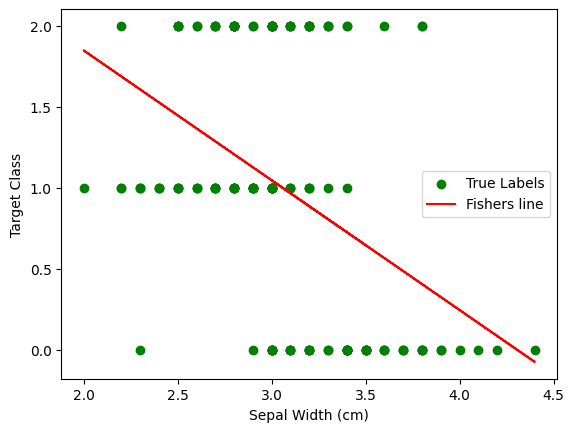

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df.head()
x = iris_df['sepal width (cm)'].values # change here
y = iris_data.target # change here

dataset_size = np.size(x)

mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x


y_pred = a * x + b


plt.scatter(x, y, color='green', label='True Labels') 
plt.plot(x, y_pred, color='red', label='Fishers line') 
plt.legend()
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Target Class')
plt.show()

In [2]:
from IPython import paths
print(paths.get_ipython_dir())


C:\Users\jan_z\.ipython
